# Modeling and Simulation in Python

Chapter 5: Design

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [2]:
%matplotlib inline

from modsim import *

Quarantine would be like an additional phase between infection and recovery. Perhaps it would take students 2 days to realize they were ill and get quarantined, and 2 more days to recover. You now have 4 stocks, S, I, Q, and R, and 3 flow rates.

In [3]:
def make_system(ct, inc, pk, p1, p2):

    init = State(S=89, I=1, P=0, R=0, A=0)
    init /= sum(init)

    t0 = 0
    t_end = 7 * 14

    return System(init=init, t0=t0, t_end=t_end,
                  ct = ct, inc = inc, pk = pk, p1 = p1, p2 = p2, absent=0)

In [4]:
ct = 1/2
inc = 1/5
pk = 1/2
p1 = .80
p2 = .20

system = make_system(ct, inc, pk, p1, p2)

In [5]:
def update(state, system):
    unpack(system)
    s, i, p, r, a= state
    
    infected = ct * (i*p1 + p*p2) * s
    peak = inc * i
    recovered = pk * p
    absent = i*(1-p1)+p*(1-p2)
    
    s -= infected
    i += infected - peak
    p += peak - recovered
    r += recovered
    a += absent
    return State(S=s, I=i, P=p, R=r, A=a)

In [6]:
def run_simulation(system, update_func):
   
    S = TimeSeries()
    I = TimeSeries()
    P = TimeSeries()
    R = TimeSeries()
    A = TimeSeries()

    state = system.init
    t0 = system.t0
    S[t0], I[t0], P[t0], R[t0], A[t0] = state
    
    for t in linrange(system.t0, system.t_end):
        state = update_func(state, system)
        S[t+1], I[t+1], P[t+1], R[t+1], A[t+1]= state
    
    system.S = S
    system.I = I
    system.P = P
    system.R = R
    system.A = A

In [7]:
def run_simulation2(system, update_func):
    frame = DataFrame(columns=system.init.index)
    frame.loc[system.t0] = system.init
    
    for t in linrange(system.t0, system.t_end):
        frame.loc[t+1] = update_func(frame.loc[t], system)
    
    system.results = frame

In [8]:
def plot_results(S, I, P, R, A):
    plot(S, '--', color='blue', label='Susceptible')
    plot(I, '-', color='red', label='Infected')
    plot(P, '.', color = 'yellow', label='Peak')
    plot(R, ':', color='green', label='Recovered')
    plot(A, '*', color='Purple', label='Absences')
    legend(loc ='best')
    decorate(xlabel='Time (days)',
             ylabel='Fraction of population')

In [13]:
run_simulation2(system, update)


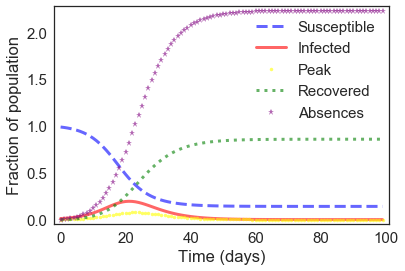

In [14]:
plot_results(system.S, system.I, system.P, system.R, system.A)


0.0111111111111


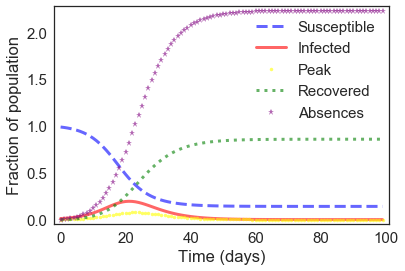

In [17]:
frame = system.results
plot_results(system.results.S, frame.I, frame.P, frame.R, frame.A)